<a href="https://colab.research.google.com/github/jpdeleon/chronos/blob/master/notebooks/examples-tois_hrd_cmd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install git+https://github.com/jpdeleon/chronos.git@master

In [2]:
import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


## Load TOI table and pre-querried gaia params

In [3]:
tois = cr.get_tois()
tois.head()

,TIC ID,TOI,Previous CTOI,Master,SG1A,SG1B,SG2,SG3,SG4,SG5,...,Stellar log(g) (cm/s^2) err,Stellar Radius (R_Sun),Stellar Radius (R_Sun) err,Stellar Metallicity,Stellar Metallicity err,Sectors,Date TOI Alerted (UTC),Date TOI Updated (UTC),Date Modified,Comments
0,231663901,101.01,NaN,5,5,5,5,5,5,5,...,NaN,0.86,NaN,NaN,NaN,1,2018-09-05 18:34:18,2019-12-17 15:43:31,2020-03-04 13:49:16,WASP-46 b
1,149603524,102.01,NaN,5,5,5,5,5,5,5,...,NaN,1.28,NaN,0.24,0.05,"1,2,3,4,6",2018-09-05 18:34:18,2019-12-17 15:43:39,2020-01-16 02:34:07,WASP 62b
2,336732616,103.01,NaN,5,5,5,5,5,5,5,...,NaN,1.40,NaN,NaN,NaN,1,2018-09-05 18:34:18,2019-12-17 15:43:31,2020-01-16 02:34:07,HATS-3
3,231670397,104.01,NaN,5,5,5,5,5,5,5,...,NaN,2.07,NaN,NaN,NaN,1,2018-09-05 18:34:18,2019-12-17 15:43:31,2020-01-16 02:34:07,WASP-73
4,144065872,105.01,NaN,5,5,5,5,5,5,5,...,NaN,1.13,NaN,NaN,NaN,1,2018-09-05 18:34:19,2019-12-17 15:43:31,2020-01-16 02:34:07,WASP-95


In [4]:
tois_gaia = cr.query_gaia_params_of_all_tois(clobber=False, update=False)
tois_gaia.head()

Loaded: /home/jp/github/research/project/chronos/chronos/../data/TOIs.csv
TOIs with TFPWG disposition==FP are removed.
Saved: /home/jp/github/research/project/chronos/chronos/../data/TOIs.csv

Loaded: /home/jp/github/research/project/chronos/chronos/../data/toi_gaia_params.hdf5


,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,distance
TOI,,,,,,,,,,,,,,,,,,,,,
101.01,1635721458409799680,Gaia DR2 6462994429708755072,6462994429708755072,332857530,2015.5,318.737,0.0215141,-55.8719,0.0209095,2.63604,...,0.0024,0.0278,200111,0.87444,0.725109,0.919871,0.774228,0.758957,0.789501,0.00041078
102.01,1635721458409799680,Gaia DR2 4756649415309914240,4756649415309914240,368697484,2015.5,87.1398,0.0177795,-63.9883,0.0195084,5.66486,...,0.035,0.1713,200111,1.29827,1.14553,1.36217,2.13853,2.12494,2.15212,0.000340658
103.01,1635721458409799680,Gaia DR2 6805886373600546176,6805886373600546176,1298169308,2015.5,312.457,0.0385101,-24.4287,0.024196,2.40421,...,0.015,0.154,200111,1.2507,1.17037,1.31592,2.21443,2.15539,2.27347,0.000662245
104.01,1635721458409799680,Gaia DR2 6453566701615683456,6453566701615683456,622163709,2015.5,319.95,0.0217349,-58.1489,0.0219644,3.12923,...,NaN,NaN,200111,2.31394,2.13629,2.41422,5.9342,5.84431,6.0241,0.000364185
105.01,1635721458409799680,Gaia DR2 6518399301667782016,6518399301667782016,988761818,2015.5,337.458,0.0260726,-48.0031,0.0336186,7.24182,...,0.026,0.2463,200111,1.23187,1.21159,1.25816,1.50596,1.49347,1.51845,0.000371384


## HRD

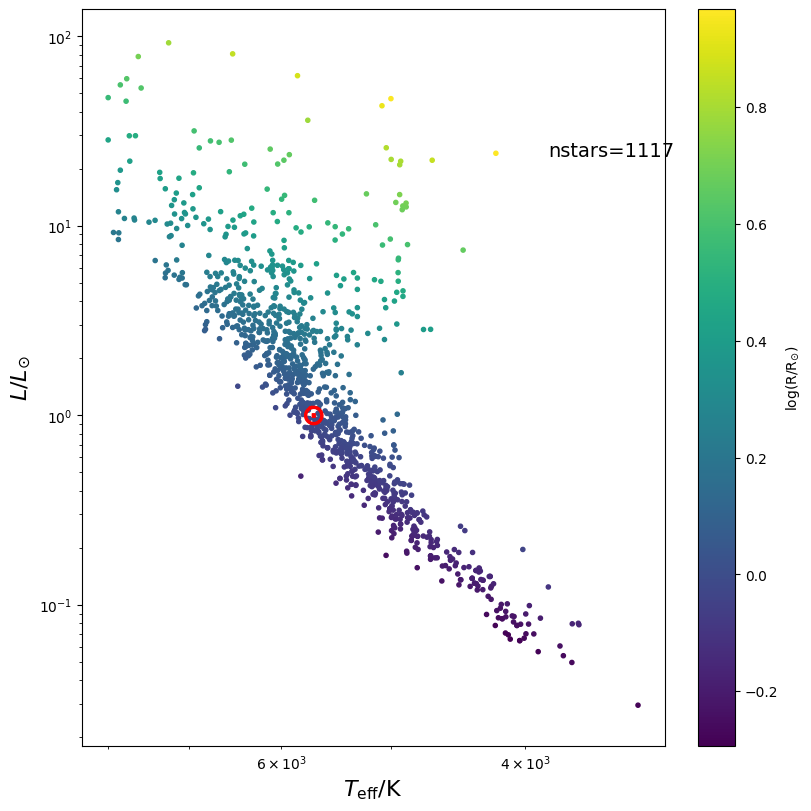

In [8]:
ax = cr.plot_hrd(df=tois_gaia, annotate_Sun=True)

## CMD

19 removed NaN or negative parallaxes


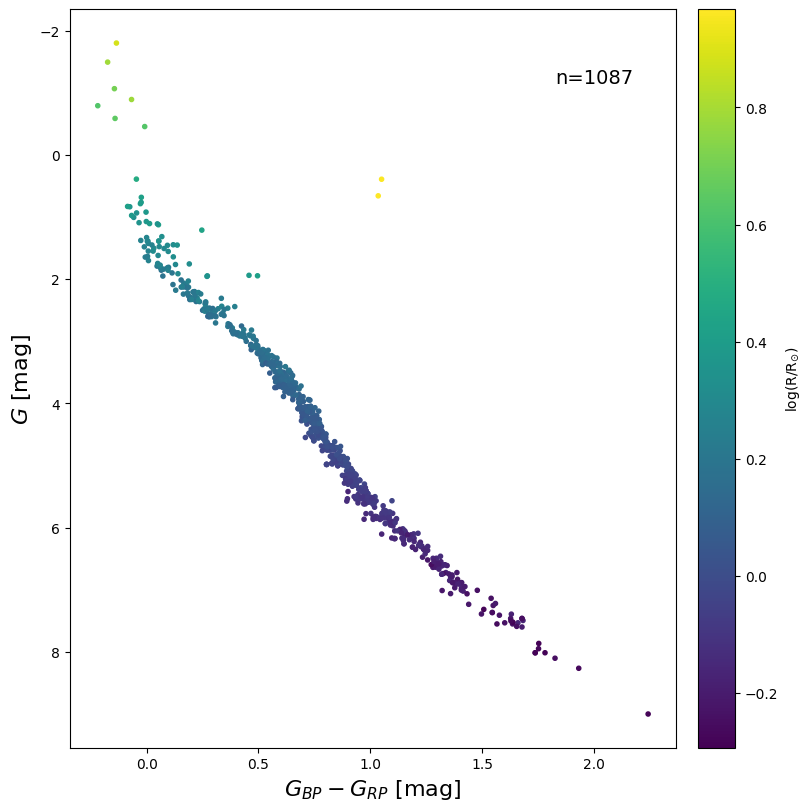

In [6]:
ax = cr.plot_cmd(df=tois_gaia)